In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
train = pd.read_csv("train.csv")


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

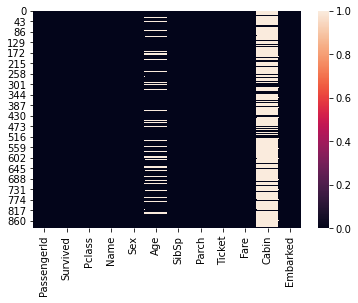

In [5]:
sns.heatmap(train.isnull())

<AxesSubplot:xlabel='Survived', ylabel='count'>

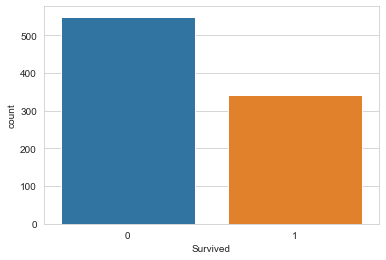

In [6]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

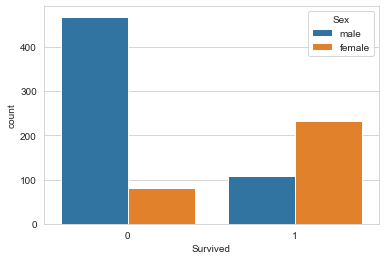

In [7]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue="Sex" ,data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

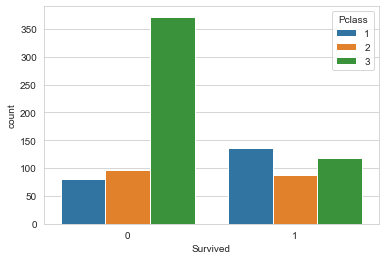

In [8]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue="Pclass" ,data=train)

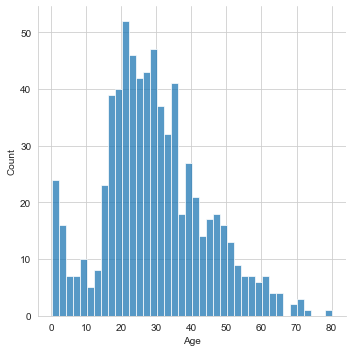

In [9]:
sns.displot(train["Age"].dropna(),kde=False,bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

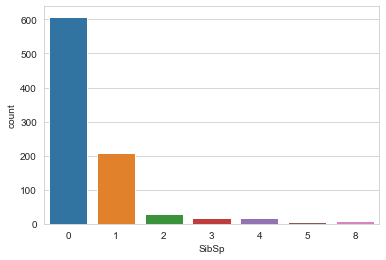

In [10]:
sns.countplot(x="SibSp",data=train)

<AxesSubplot:>

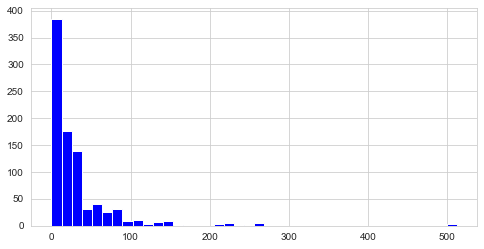

In [11]:
train['Fare'].hist(color="blue",bins=40,figsize=(8,4))

data cleaning



<AxesSubplot:xlabel='Pclass', ylabel='Age'>

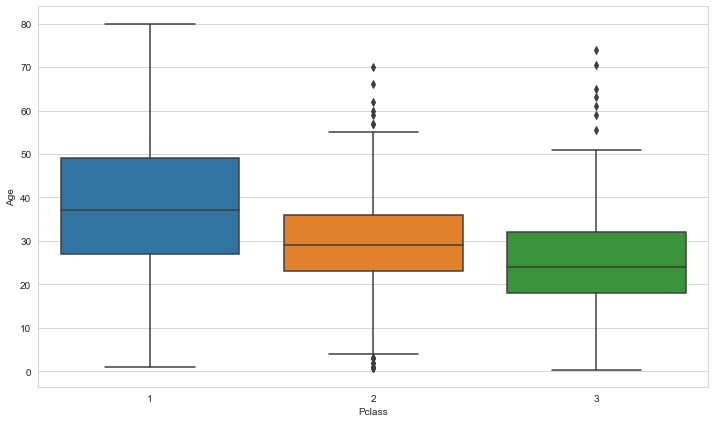

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [13]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
        
    else:
         return Age

In [14]:
train['Age']= train[['Age','Pclass']].apply(input_age,axis=1)

<AxesSubplot:>

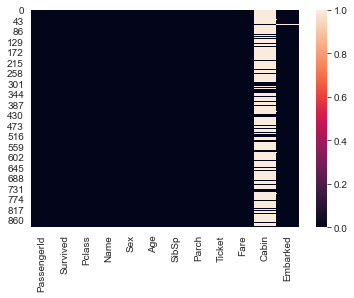

In [15]:
sns.heatmap(train.isnull())

In [16]:
train.drop('Cabin',axis=1,inplace=True)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

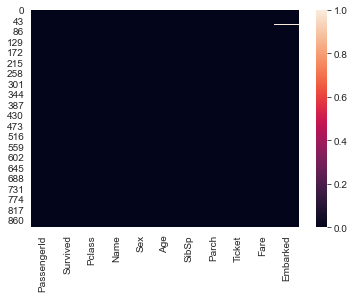

In [18]:
sns.heatmap(train.isnull())

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
pd.get_dummies(train['Embarked'],drop_first=True).head()


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
sex= pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)



In [23]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [24]:
train=pd.concat([train,sex,embark],axis=1)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [26]:
test=pd.read_csv("test.csv")
sex= pd.get_dummies(test['Sex'],drop_first=True)
embark=pd.get_dummies(test['Embarked'],drop_first=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test=pd.concat([test,sex,embark],axis=1)

building logistic regression model

In [27]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [28]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [160]:
X_train,X_test,y_train,y_test= train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.469,random_state=101)

In [161]:
from sklearn.linear_model import LogisticRegression


In [162]:
logmodel= LogisticRegression(max_iter=3000)
logmodel.fit(X_train,y_train)


LogisticRegression(max_iter=3000)

In [163]:
predictions=logmodel.predict(X_test)

In [164]:
from sklearn.metrics import confusion_matrix

In [165]:
accuracy=confusion_matrix(y_test,predictions)

In [166]:
accuracy

array([[222,  31],
       [ 48, 117]], dtype=int64)

In [167]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,predictions)
accuracy


0.8110047846889952

In [168]:
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [169]:
#submission=pd.DataFrame({"PassengerId":train["PassengerId"],"Survived":predictions})

In [170]:
test =pd.read_csv("test.csv")

In [171]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [172]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [173]:
submission=pd.DataFrame({"PassengerId":test["PassengerId"],"Survived":predictions})

In [174]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,1
414,1306,0
415,1307,0
416,1308,1


In [178]:
submission.to_csv('C:/Users/Dell/Desktop/titanic/submission.csv',index=False)